In [184]:
using JuMP
using Clp
#using ConditionalJuMP
using Distributions
using PyPlot

# Question 1 : Valeur Optimal vs Variance

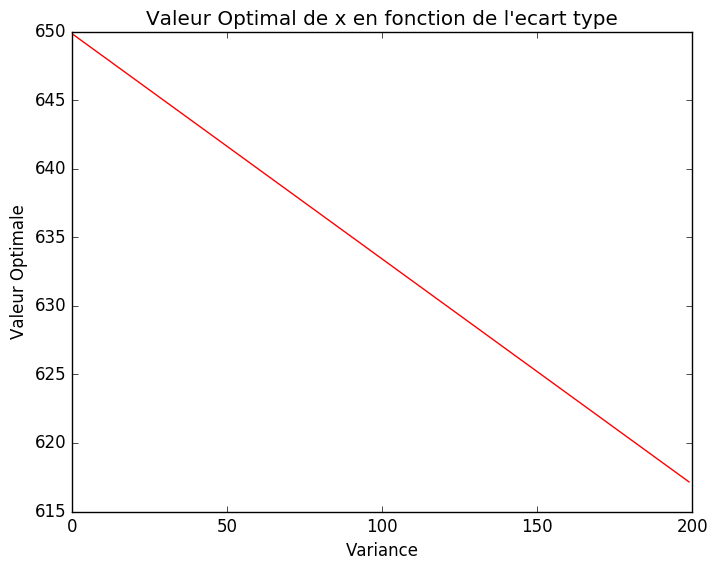

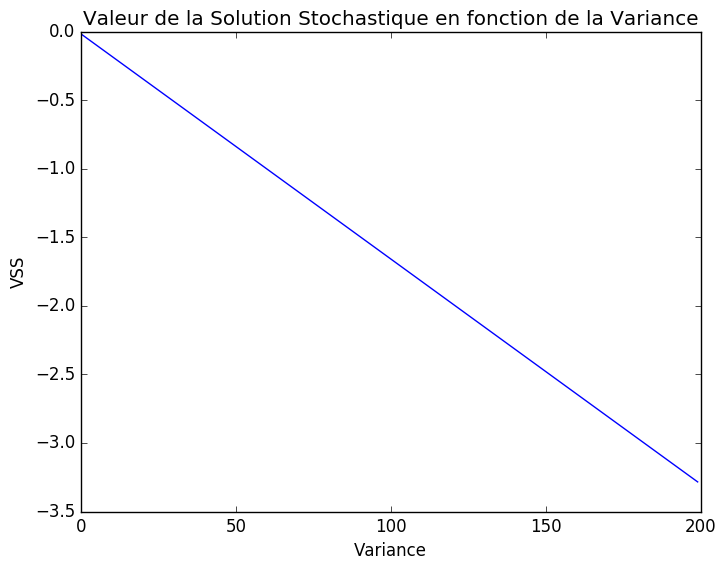

In [95]:
#Mean Case
c = 0.15
q = 0.25
r = 0.02
MeanCase = 650 * (q-c)
#We already know the optimal value of x in the mean case scenario is 650
#we can then assume that we will always buy 650 journal for the optimal mean
#case

#Now for the Stochastic Solution, we can directly use our results from the
#newsvendor problem and adjust it in accordance with the uncertainty (variance)
#we can store all of the optimal stochastic response of our problem
Stoc = Array{Float64}(200)

for i = 1:200
    d = Normal(650, (i))
    Stoc[i] = quantile(d, (q-c)/(q-r))
    #println(i)
end

#println(Stoc)
figure(1)
VSS = (Stoc .* (q-c)) .- MeanCase
plot(Stoc, color="red")
title("Valeur Optimal de x en fonction de l'ecart type")
xlabel("Variance")
ylabel("Valeur Optimale")
figure(2)
plot(VSS, color="blue")
title("Valeur de la Solution Stochastique en fonction de la Variance")
xlabel("Variance")
ylabel("VSS")
show()


On peut conclure que l'impact de la variance fait varier l'incertitude de notre second stage. Par contre, l'impact de cette incertitude est affecter par le ratio de profit/perte de nos couts. si nos valeurs de c,r changerait de sorte que c/r augmenterait, la pente de notre courbe augmenterait tandis que l'inverse la ferait diminuer d'avantage.

En ce qui concerne la valeur de la solution stochastique, la valeur de l'esperance ne changerait pas etant donner que la moyenne de notre distribution ne varie pas. La seule chose qui varie est l'ecart-type.


# Question 2: Monte Carlo

Pour cette question, nous allons simplement simuler 10^k ou k=1,2,3..6 essaies. Lors de nos essaies, nous allons prendre aleatoirement une decision first stage et second stage. Nous pourrons ensuite representer toutes ces essaies dans une graphe et en interpreter nous-memes les resultats.

In [277]:
function secondstage(demande::Float64, x::Int64)
    c = 0.15
    q = 0.25
    r = 0.02
    if demande >= x
        return (x * (q-c))
    else
        return (demande * q + (demande - x)*r - x * c)
    end
end

secondstage (generic function with 3 methods)

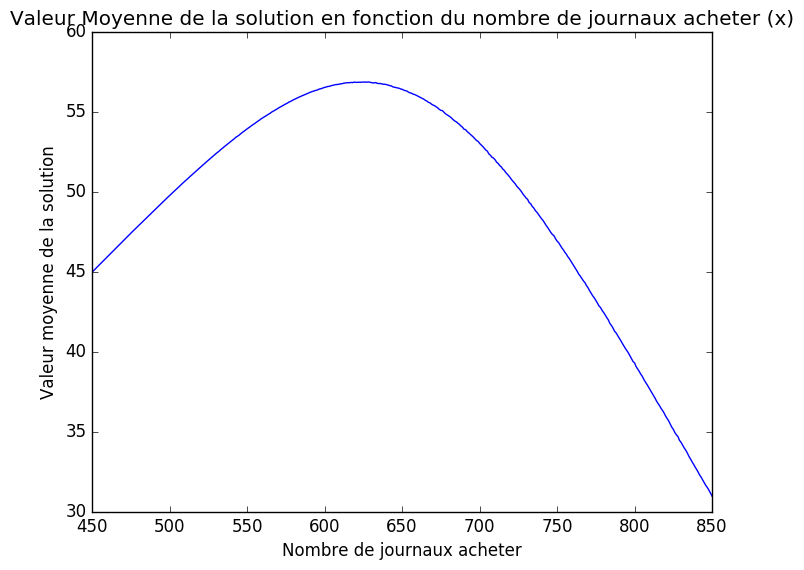

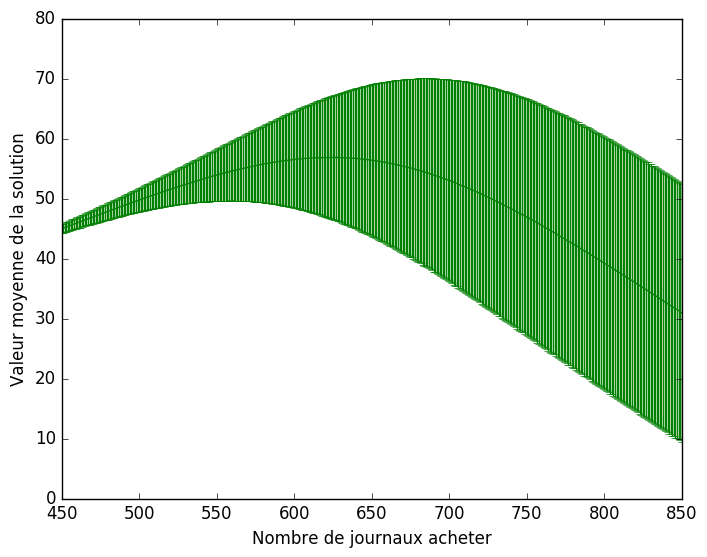

In [287]:
Mean_X = Array{Float64}(401)
SD_X = Array{Float64}(401)

k = 6


d = Normal(650, 80)

temp = Array{Float64}(10^k)
for i = 450:850
    
    for j = 1:10^k
        temp[j] = secondstage(rand(d), i)
    end
    
    Mean_X[i-449] = mean(temp)
    SD_X[i-449] = std(temp)
end
figure(1)
plot(450:850,Mean_X)
title("Valeur Moyenne de la solution en fonction du nombre de journaux acheter (x)")
xlabel("Nombre de journaux acheter")
ylabel("Valeur moyenne de la solution")
figure(2)
errorbar(450:850, Mean_X, yerr=SD_X, color="green")
xlabel("Nombre de journaux acheter")
ylabel("Valeur moyenne de la solution")
show()


Comme vous pouvez le constatez dans notre image, on peut voir que les meilleurs solution sont pres de la valeurs estimer (soit 640 pour ecart-type = 80). Nous avons obtenus le graphe en estimant 10^k tirs pour chaque demande possible. Nous avons ensuite pris la moyenne et l'écart-type de toute ces essaies et les afficher en fonction du nombre de journaux acheter, soit notre decision First-Stage. 

Lorsqu'on essaie avec des valeurs de k plus faible. On peut remarquer que beaucoup de bruit s'introduit dans nos données et qu'elle sont beaucoup moins fluides. C'est due au fait que nous avons besoin de beaucoup d'échantillonnages pour bien représenter toutes les possibilités de notre modèle.

Notre solution finale tend exactement vers les valeurs obtenus précédement avec les méthodes analytique. Par contre, en augmentant la valeur k nous avons des données beaucoup plus claire, au pris d'un temps de calcule assez élevé. 